In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [15]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<IPython.core.display.Javascript object>


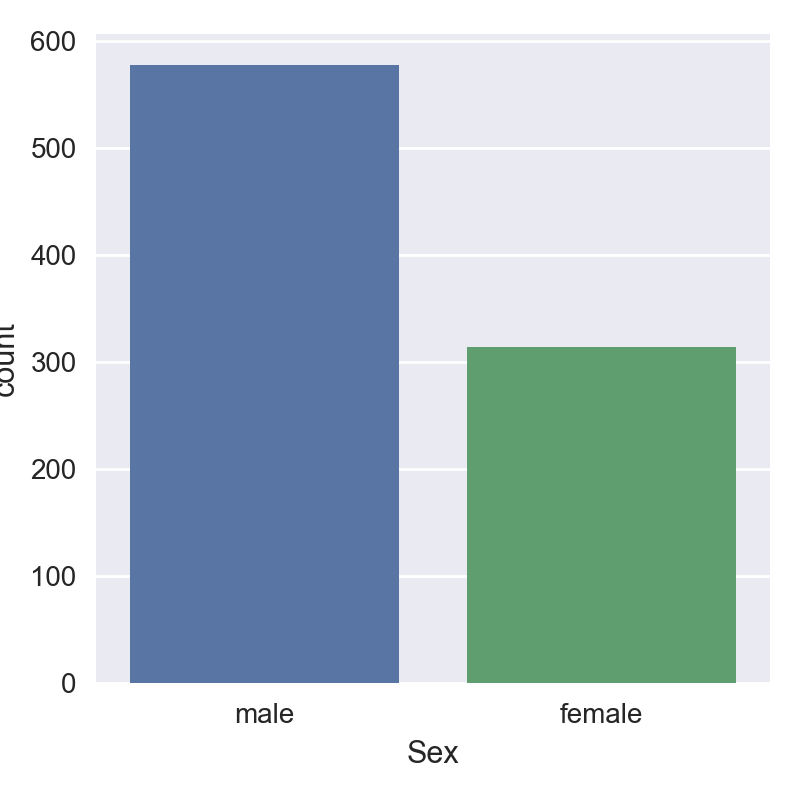

In [18]:
sns.factorplot('Sex', data=titanic_df, kind='count')

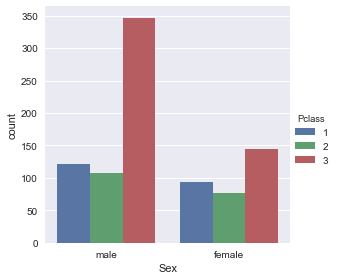

In [34]:
sns.factorplot('Sex', data=titanic_df, hue='Pclass', kind='count')

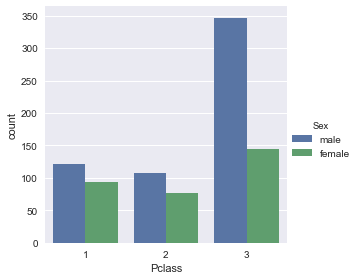

In [35]:
sns.factorplot('Pclass', data=titanic_df, hue='Sex', kind='count')

In [39]:
def male_female_child(passenger):
    age,sex=passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

Can apply function to a subset of the columns of data frame. Function unpacks list recieved upon func call.

In [40]:
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

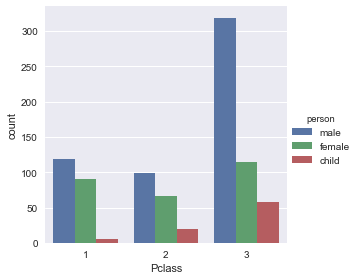

In [43]:
sns.factorplot('Pclass', data=titanic_df, hue='person', kind='count')

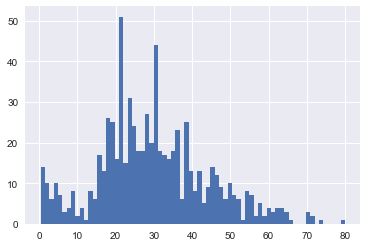

In [45]:
titanic_df['Age'].hist(bins=70)

In [46]:
titanic_df['Age'].mean()

29.69911764705882

In [47]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

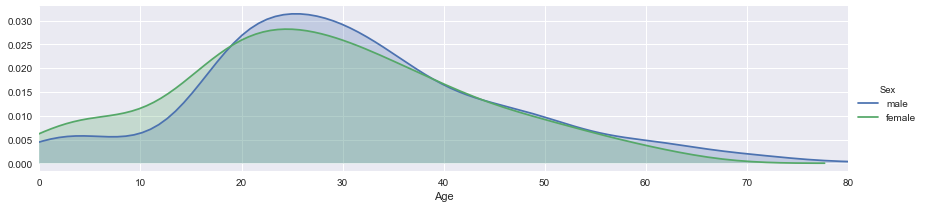

In [48]:
fig=sns.FacetGrid(titanic_df, hue='Sex', aspect=4)

fig.map(sns.kdeplot, 'Age', shade=True)

oldest=titanic_df['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

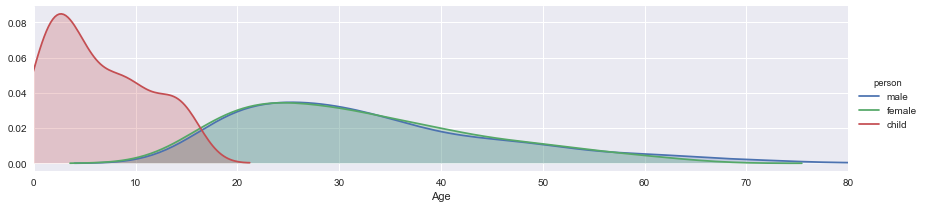

In [49]:
fig=sns.FacetGrid(titanic_df, hue='person', aspect=4)

fig.map(sns.kdeplot, 'Age', shade=True)

oldest=titanic_df['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

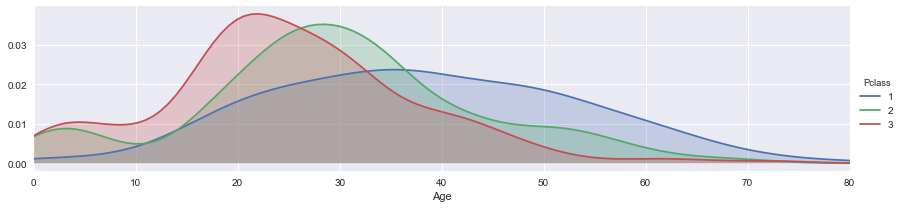

In [50]:
fig=sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)

fig.map(sns.kdeplot, 'Age', shade=True)

oldest=titanic_df['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

In [51]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


To analyize column with nulls, create new object that drops the nulls

In [52]:
deck=titanic_df['Cabin'].dropna()

In [53]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

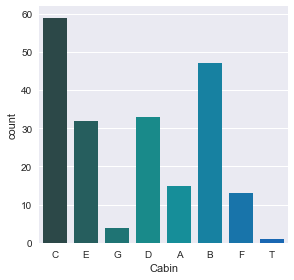

In [55]:
#loop over deck and get first letter
levels=[]
for level in deck:
    levels.append(level[0])
    
cabin_df=DataFrame(levels)
cabin_df.columns=['Cabin']

sns.factorplot('Cabin', data=cabin_df, palette='winter_d', kind='count') #palette_d makes it darker

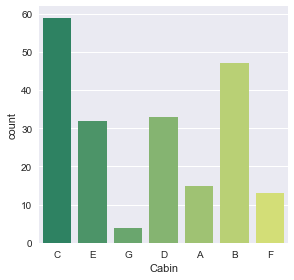

In [62]:
cabin_df=cabin_df[cabin_df['Cabin']!='T']

sns.factorplot('Cabin', data=cabin_df, palette='summer', kind='count')

In [63]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


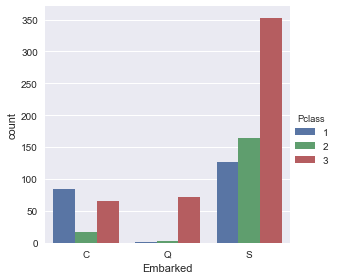

In [68]:
sns.factorplot('Embarked', data=titanic_df, hue='Pclass', order=['C', 'Q', 'S'], kind='count')

# Who was alone and who was with family?

In [69]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [70]:
titanic_df['Alone']=titanic_df['SibSp']+titanic_df['Parch']

In [71]:
#set as 'With Family' and 'Alone'
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

/Users/pat/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# #can use pd.options.mode.chained_assignment = None  # default='warn' to disable this warning.

# see http://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas for more details.

In [72]:
titanic_df['Alone'].value_counts()

Alone          537
With Family    354
Name: Alone, dtype: int64

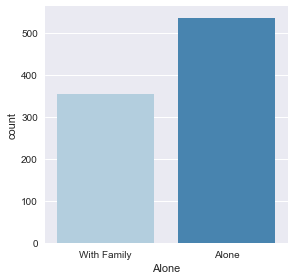

In [73]:
sns.factorplot('Alone', data=titanic_df, palette='Blues', kind='count')

# What factors helped somebody survive?

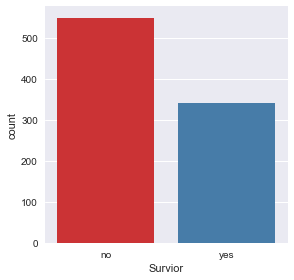

In [79]:
titanic_df['Survior']=titanic_df['Survived'].map({0:'no', 1:'yes'})
sns.factorplot('Survior', data=titanic_df, palette='Set1', kind='count')

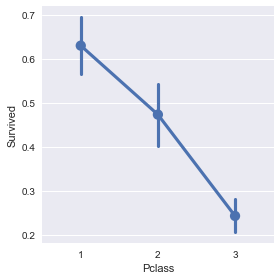

In [80]:
sns.factorplot('Pclass', 'Survived', data=titanic_df)

# Class 3 survived less, however we know class 3 had more men.  Is surviving a function of women and children first?

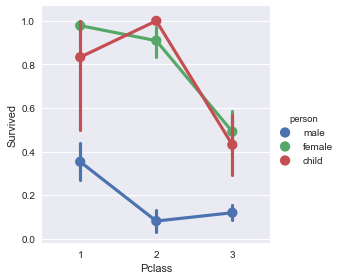

In [82]:
sns.factorplot('Pclass', 'Survived', hue='person', data=titanic_df)

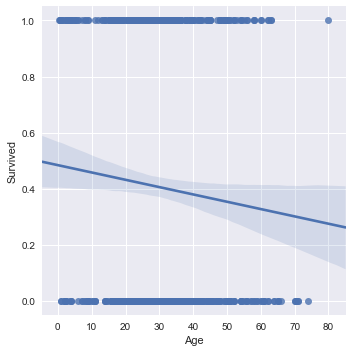

In [83]:
sns.lmplot('Age', 'Survived', data=titanic_df)

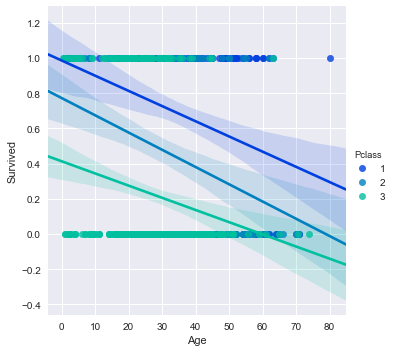

In [84]:
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, palette='winter')

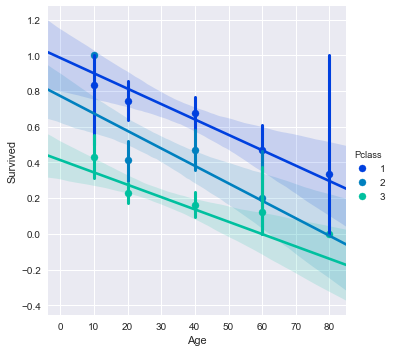

In [85]:
generations=[10,20,40,60,80]

sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, palette='winter', x_bins=generations)

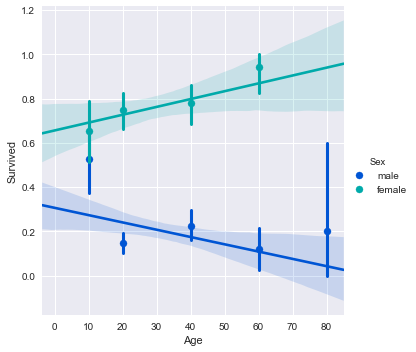

In [86]:
sns.lmplot('Age', 'Survived', hue='Sex', data=titanic_df, palette='winter', x_bins=generations)

# Did deck have an impact on passenger survival rate?
# Did having a family member increase odds of survival?

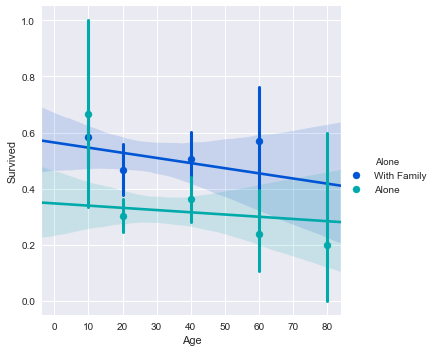

In [87]:
sns.lmplot('Age', 'Survived', hue='Alone', data=titanic_df, palette='winter', x_bins=generations)